# Machine Learning Ex1

### Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

### Configuration

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 6]

# define plt and sns styles
sns.set_style("whitegrid")
sns.set_palette("Set2")

## Data Loading

In [3]:
df_train = pd.read_csv('data/amazon_review_ID.shuf.lrn.csv')
df_train.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000,Class
0,0,14,9,8,12,7,4,5,3,2,...,0,1,0,1,0,1,1,0,0,Grove
1,1,12,3,8,6,5,3,2,3,2,...,0,0,0,0,0,0,0,0,0,Chell
2,2,17,5,7,12,8,3,0,3,2,...,0,1,0,0,0,0,1,0,0,Auken
3,3,9,6,10,6,4,7,7,3,3,...,0,0,0,0,2,0,0,0,0,Davisson
4,4,8,4,5,5,1,7,0,0,0,...,0,0,3,0,0,0,0,0,0,Vision


In [4]:
X_test = pd.read_csv('data/amazon_review_ID.shuf.tes.csv')
X_test.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V9991,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000
0,750,12,8,9,10,9,4,0,3,2,...,0,0,0,0,0,0,0,0,0,0
1,751,7,6,2,5,1,7,9,5,4,...,4,0,0,0,0,0,0,0,0,0
2,752,9,7,3,7,5,3,1,2,5,...,0,0,0,0,0,1,0,1,0,0
3,753,7,7,6,6,5,2,14,0,9,...,0,0,0,0,0,0,0,0,1,0
4,754,26,13,11,15,6,4,3,5,4,...,0,1,0,1,0,0,0,1,1,0


In [5]:
df_train.describe()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V9991,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000
count,750.00000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,374.50000,12.041333,7.725333,6.750667,6.716000,6.172000,4.686667,3.837333,3.752000,2.885333,...,0.216000,0.196000,0.217333,0.169333,0.196000,0.185333,0.225333,0.197333,0.230667,0.214667
std,216.65064,5.720658,3.685829,3.382665,3.923587,3.307315,2.955244,4.017012,2.406564,2.100333,...,0.555357,0.573314,0.516193,0.505635,0.519561,0.466843,0.494183,0.466207,0.494421,0.561847
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,187.25000,8.000000,5.000000,4.000000,4.000000,4.000000,2.000000,1.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,374.50000,11.000000,7.000000,7.000000,6.000000,6.000000,4.000000,2.500000,3.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,561.75000,16.000000,10.000000,9.000000,9.000000,8.000000,7.000000,6.000000,5.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,749.00000,32.000000,21.000000,20.000000,25.000000,24.000000,15.000000,18.000000,14.000000,13.000000,...,4.000000,6.000000,4.000000,5.000000,5.000000,4.000000,3.000000,3.000000,3.000000,4.000000


<Axes: >

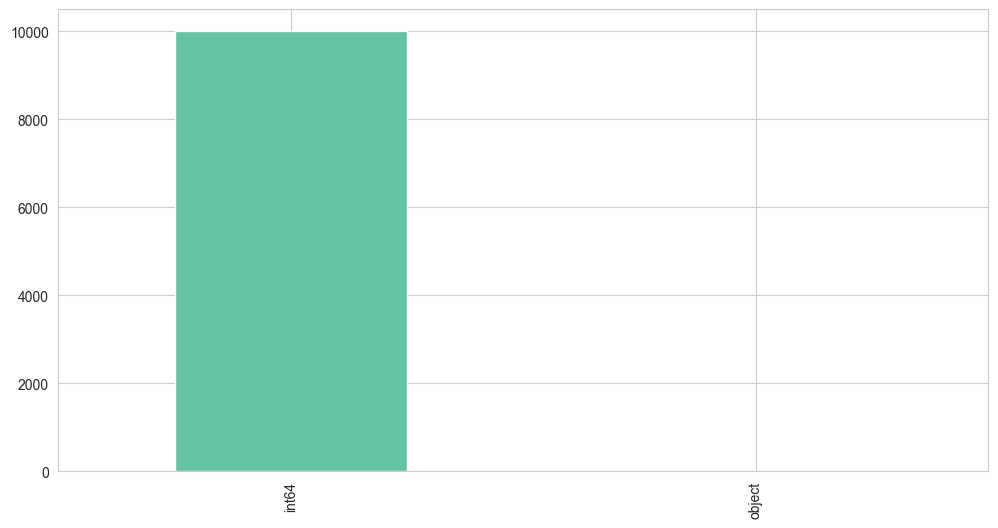

In [6]:
df_train.dtypes.value_counts().plot(kind='bar')

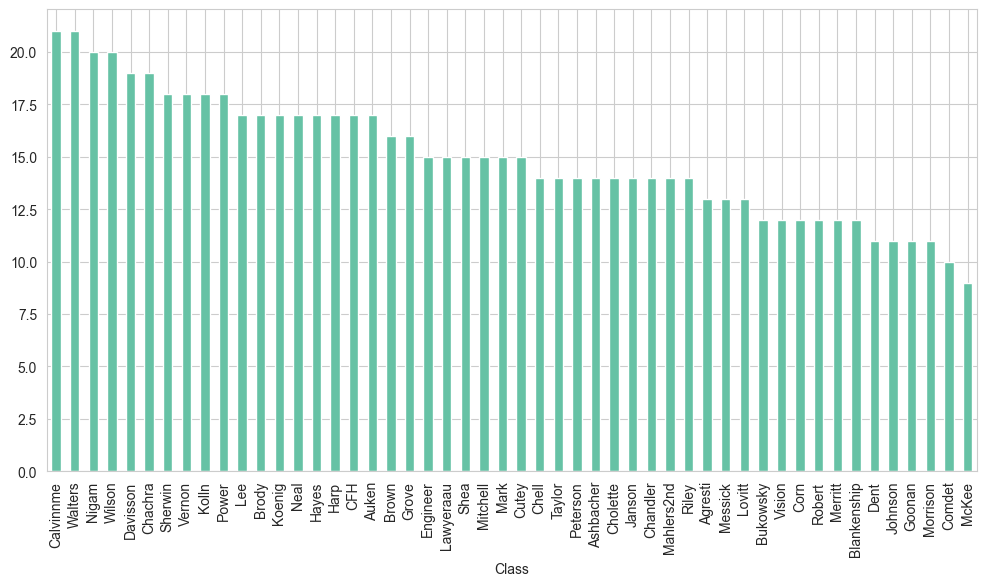

In [7]:
df_train['Class'].value_counts().plot(kind='bar')
plt.savefig('images/class_distribution.png')

In [8]:
# Count the number of unique labels
len(df_train['Class'].unique())


50

## Data Cleaning and Preprocessing


In [9]:
# Setting the ID column as index
df_train.set_index('ID', inplace=True)
X_test.set_index('ID', inplace=True)

# Splitting of the target column
X_train = df_train.drop('Class', axis=1)
y_train = df_train['Class']
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V9991,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000
ID,,,,,,,,,,,,,,,,,,,,,
0,14,9,8,12,7,4,5,3,2,2,...,2,0,1,0,1,0,1,1,0,0
1,12,3,8,6,5,3,2,3,2,0,...,0,0,0,0,0,0,0,0,0,0
2,17,5,7,12,8,3,0,3,2,3,...,0,0,1,0,0,0,0,1,0,0
3,9,6,10,6,4,7,7,3,3,3,...,0,0,0,0,0,2,0,0,0,0
4,8,4,5,5,1,7,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0


In [10]:
X_train, X_vali, y_train, y_vali = train_test_split(X_train, y_train, test_size=0.3, random_state=420, stratify=y_train)
    
# Check unique labels in y_train and y_vali
missing_labels = set(y_vali.unique()) - set(y_train.unique())
assert len(missing_labels) == 0, "Labels in y_test not in y_train"

In [11]:
# Checking the shapes
print(f'X_train shape: {X_train.shape}')
print(f'X_vali shape: {X_vali.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_vali shape: {y_vali.shape}')

X_train shape: (525, 10000)
X_vali shape: (225, 10000)
y_train shape: (525,)
y_vali shape: (225,)


### Checking for missing values

In [12]:
# Checking for null values
print(f'Amount null values in X_train: {X_train.isnull().sum().sum()}')
print(f'Amount null values in X_vali: {X_vali.isnull().sum().sum()}')
print(f'Amount null values in y_train: {y_train.isnull().sum().sum()}')
print(f'Amount null values in y_vali: {y_vali.isnull().sum().sum()}')

Amount null values in X_train: 0
Amount null values in X_vali: 0
Amount null values in y_train: 0
Amount null values in y_vali: 0


### Converting target variable to numeric

Converting a categorical variable like this we have (names of people who wrote the review). Would usually result in using One-Hot Encoding, but the column is our target. For most classification algorithms its not necessary to transform our classification problem into a multiclass problem as many classification algorithms (XGboost, DecisionTrees, kNN and SVM) don't intepret a relationship between the labels.

Warning: Methods like neural networks, especially those using softmax intepret relationships between labels.

In [13]:
label_encoder = LabelEncoder()
y_train_temp = label_encoder.fit_transform(y_train)

y_vali_temp = label_encoder.transform(y_vali)

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

y_train_numeric_labels = pd.DataFrame(y_train_temp, columns=['Class'], index=y_train.index)
y_vali_numeric_labels = pd.DataFrame(y_vali_temp, columns=['Class'], index=y_vali.index)

y_train_numeric_labels.head()

,Class
ID,
727,46
215,3
626,26
478,5
99,28


In [14]:
label_mapping.keys()

dict_keys(['Agresti', 'Ashbacher', 'Auken', 'Blankenship', 'Brody', 'Brown', 'Bukowsky', 'CFH', 'Calvinnme', 'Chachra', 'Chandler', 'Chell', 'Cholette', 'Comdet', 'Corn', 'Cutey', 'Davisson', 'Dent', 'Engineer', 'Goonan', 'Grove', 'Harp', 'Hayes', 'Janson', 'Johnson', 'Koenig', 'Kolln', 'Lawyeraau', 'Lee', 'Lovitt', 'Mahlers2nd', 'Mark', 'McKee', 'Merritt', 'Messick', 'Mitchell', 'Morrison', 'Neal', 'Nigam', 'Peterson', 'Power', 'Riley', 'Robert', 'Shea', 'Sherwin', 'Taylor', 'Vernon', 'Vision', 'Walters', 'Wilson'])

## Methods

In [15]:
def apply_scaling(X_train, X_vali, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_vali_scaled = scaler.transform(X_vali)
    X_test_scaled = scaler.transform(X_test)

    df_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    df_vali_scaled = pd.DataFrame(X_vali_scaled, columns=X_vali.columns)
    df_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

    return df_train_scaled, df_vali_scaled, df_test_scaled

In [16]:
def apply_outlier_removal(X_train, y_train, factor=1.5):
    # Calculate the IQR for each column
    Q1 = np.quantile(X_train, 0.25, axis=0)
    Q3 = np.quantile(X_train, 0.75, axis=0)
    IQR = Q3 - Q1

    # Outlier detection
    outliers = (X_train < Q1 - factor * IQR) | (X_train > Q3 + factor * IQR)

    # The dataset has many columns with outliers, 
    # so we will remove rows where the number of 
    # outliers exceeds 10% of the total number of columns
    threshold = max(1, int(0.1 * X_train.shape[1]))
    rows_to_remove = outliers.sum(axis=1) >= threshold

    # Only remove rows where the number of outliers exceeds the maximum
    X_clean = X_train[~rows_to_remove]
    y_clean = y_train[~rows_to_remove]

    return X_clean, y_clean

In [17]:
def calculate_optimal_pca(X_train):
    pca = PCA()
    pca.fit(X_train)
    explained_variance = np.cumsum(pca.explained_variance_ratio_)

    # plt.figure()
    # plt.plot(explained_variance)
    # plt.xlabel('Number of Components')
    # plt.ylabel('Variance (%)')
    # plt.title('Explained Variance')
    # plt.grid(True)
    # plt.show()

    n_components = np.where(explained_variance > 0.95)[0][0] + 1
    return n_components

In [18]:
def apply_pca(X_train, X_vali, n_components):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_vali_pca = pca.transform(X_vali)

    X_train_pca = pd.DataFrame(data=X_train_pca, columns=[f'PC{i}' for i in range(1, n_components + 1)])
    X_vali_pca = pd.DataFrame(data=X_vali_pca, columns=[f'PC{i}' for i in range(1, n_components + 1)])

    return X_train_pca, X_vali_pca

## Modeling

In [19]:
# Main experiment function
def run_experiment(X_train, X_vali, y_train, y_vali, X_test, algorithm_func, use_pca=False, remove_outliers=False, scale_data=False):

    if remove_outliers:
        X_train, y_train = apply_outlier_removal(X_train, y_train) 
        assert X_train.shape[0] == y_train.shape[0], "X_train and y_train should have the same amount of rows"
        assert X_train.shape[0] > 0, "X_train has no rows left"

    if scale_data:
        X_train, X_vali, X_test = apply_scaling(X_train, X_vali, X_test)

    if use_pca:
        n_components = calculate_optimal_pca(X_train)
        X_train, X_vali = apply_pca(X_train, X_vali, n_components)

    prediction = algorithm_func.fit(X_train, y_train).predict(X_vali)

    conf_matrix = confusion_matrix(y_vali, prediction)

    metrics = {
        'accuracy': accuracy_score(prediction, y_vali),
        'precision': precision_score(prediction, y_vali, average='macro', zero_division=1),
        'recall': recall_score(prediction, y_vali, average='macro', zero_division=1),
        'f1': f1_score(prediction, y_vali, average='macro')
    }
    return metrics, conf_matrix

In [20]:
from sklearn.model_selection import KFold

def run_experiment_with_changes_cv(X_train, X_vali, y_train, y_vali, X_test, algorithm_func, use_pca=False, remove_outliers=False, scale_data=False):

    # Concatenate the training and validation sets
    X_train = pd.concat([X_train, X_vali])
    y_train = np.concatenate([y_train, y_vali])

    # Initialize KFold cross-validation
    kfold = KFold(n_splits=3)

    # Initialize a overall confusion matrix based on the number of classes
    unique_classes = np.unique(y_train)
    overall_confusion_matrix = np.zeros((len(unique_classes), len(unique_classes)))


    results_per_fold = []

    # Perform cross-validation
    for train_index, vali_index in kfold.split(X_train):
        # Split the training data into training and validation sets
        X_train_cv, X_vali_cv = X_train.iloc[train_index], X_train.iloc[vali_index]
        y_train_cv, y_vali_cv = y_train[train_index], y_train[vali_index]

        # Apply outlier removal if necessary
        if remove_outliers:
            X_train_cv, y_train_cv = apply_outlier_removal(X_train_cv, y_train_cv)
            assert X_train_cv.shape[0] == y_train_cv.shape[0], "X_train and y_train should have the same amount of rows"
            assert X_train_cv.shape[0] > 0, "X_train has no rows left"

        # Apply scaling if necessary
        if scale_data:
            X_train_cv, X_vali_cv, X_test = apply_scaling(X_train_cv, X_vali_cv, X_test)

        # Apply PCA if necessary
        if use_pca:
            n_components = calculate_optimal_pca(X_train_cv)
            X_train_cv, X_vali_cv = apply_pca(X_train_cv, X_vali_cv, n_components=n_components)

        # Initialize GridSearchCV with the estimator returned by algorithm_func
        prediction = algorithm_func.fit(X_train_cv, y_train_cv).predict(X_vali_cv)

        overall_confusion_matrix += confusion_matrix(y_vali_cv, prediction)

        metrics = {
            'accuracy': accuracy_score(prediction, y_vali_cv),
            'precision': precision_score(prediction, y_vali_cv, average='macro', zero_division=1),
            'recall': recall_score(prediction, y_vali_cv, average='macro', zero_division=1),
            'f1': f1_score(prediction, y_vali_cv, average='macro')
        }
        results_per_fold.append(metrics)

    cv_results_df = pd.DataFrame(results_per_fold)
    # just return the mean for every metric
    mean_metrics = cv_results_df.mean().to_dict()

    return mean_metrics, overall_confusion_matrix

In [22]:
from sklearn.model_selection import ParameterGrid
import time
results = []

param_grid = {
    'decision_tree_classifier': list(ParameterGrid({
        'max_depth': [10, 50, None],
        'min_samples_split': [2, 10, 20],
        'min_samples_leaf': [1, 5, 10],
        'criterion': ['gini', 'entropy']
    })),
    'svm_classifier': list(ParameterGrid({
        'C': [0.01, 1, 10],
        'kernel': ['linear'],
    })),
    'knn_classifier': list(ParameterGrid({
        'n_neighbors': [3, 10, 15],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'minkowski']
    }))
}


algorithms = {
        'decision_tree_classifier': DecisionTreeClassifier(),
        'svm_classifier': SVC(),
        'knn_classifier': KNeighborsClassifier()
    }

for algorithm_key, algorithm in algorithms.items():
    print(f'Starting with {algorithm_key}...')
    if algorithm_key in param_grid:
        for use_pca in [True, False]:
            for scale_data in [True, False]:
                for remove_outliers in [True, False]:
                    for validation_method in ['cross_validation', 'holdout']:

                        print(f'Running {algorithm_key} with use_pca={use_pca}, scale_data={scale_data}, remove_outliers={remove_outliers}, validation_method={validation_method}...')
                        if validation_method == 'holdout':
                            default_algorithm = type(algorithm)()
                            start_time = time.time()
                            metrics, conf_matrix = run_experiment(
                                X_train, 
                                X_vali, 
                                y_train_numeric_labels.iloc[:, 0].values, 
                                y_vali_numeric_labels.iloc[:, 0].values, 
                                X_test,
                                algorithm, 
                                use_pca, 
                                remove_outliers, 
                                scale_data
                            )
                            end_time = time.time()
                            results.append({
                            'algorithm': algorithm_key,
                            'validation_method': validation_method,
                            'remove_outliers': remove_outliers,
                            'scale_data': scale_data,
                            'use_pca': use_pca,
                            'params': 'default',
                            'time': end_time - start_time,
                            'conf_matrix': conf_matrix.tolist(), # Convert to list to be able to serialize to JSON
                            **metrics
                            })
                        elif validation_method == 'cross_validation':
                            # loop over the parameters for the current algorithm
                            for param in param_grid[algorithm_key]:
                                algorithm.set_params(**param)
                                start_time = time.time()
                                mean_metrics, conf_matrix = run_experiment_with_changes_cv(
                                    X_train, 
                                    X_vali, 
                                    y_train_numeric_labels.iloc[:, 0].values, 
                                    y_vali_numeric_labels.iloc[:, 0].values, 
                                    X_test,
                                    algorithm,  # Pass the algorithm instance, not the string
                                    use_pca, 
                                    remove_outliers, 
                                    scale_data
                                )
                                end_time = time.time()
                                results.append({
                                    'algorithm': algorithm_key,
                                    'validation_method': validation_method,
                                    'remove_outliers': remove_outliers,
                                    'scale_data': scale_data,
                                    'use_pca': use_pca,
                                    'params': param,
                                    'time': end_time - start_time,
                                    'conf_matrix': conf_matrix.tolist(),
                                    **mean_metrics
                                })
    print('\n\n')

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)

Starting with decision_tree_classifier...
Running decision_tree_classifier with use_pca=True, scale_data=True, remove_outliers=True, validation_method=cross_validation...
Running decision_tree_classifier with use_pca=True, scale_data=True, remove_outliers=True, validation_method=holdout...
Running decision_tree_classifier with use_pca=True, scale_data=True, remove_outliers=False, validation_method=cross_validation...
Running decision_tree_classifier with use_pca=True, scale_data=True, remove_outliers=False, validation_method=holdout...
Running decision_tree_classifier with use_pca=True, scale_data=False, remove_outliers=True, validation_method=cross_validation...
Running decision_tree_classifier with use_pca=True, scale_data=False, remove_outliers=True, validation_method=holdout...
Running decision_tree_classifier with use_pca=True, scale_data=False, remove_outliers=False, validation_method=cross_validation...
Running decision_tree_classifier with use_pca=True, scale_data=False, remove

In [23]:
results_df.sort_values(by='accuracy', ascending=False)

,algorithm,validation_method,remove_outliers,scale_data,use_pca,params,time,conf_matrix,accuracy,precision,recall,f1
463,svm_classifier,holdout,False,True,False,default,2.254668,"[[3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.591111,0.573667,0.781159,0.588467
459,svm_classifier,holdout,True,True,False,default,2.547507,"[[3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.591111,0.573667,0.781159,0.588467
443,svm_classifier,holdout,True,True,True,default,3.523500,"[[3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.546667,0.532000,0.753095,0.550581
447,svm_classifier,holdout,False,True,True,default,3.420211,"[[3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.546667,0.532000,0.753095,0.550581
471,svm_classifier,holdout,False,False,False,default,1.841016,"[[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.515556,0.506000,0.619881,0.519863
...,...,...,...,...,...,...,...,...,...,...,...,...
489,knn_classifier,cross_validation,False,True,True,"{'metric': 'euclidean', 'n_neighbors': 15, 'we...",9.234733,"[[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,...",0.029333,0.030397,0.886036,0.009659
547,knn_classifier,cross_validation,False,True,False,"{'metric': 'minkowski', 'n_neighbors': 15, 'we...",1.842949,"[[0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0,...",0.028000,0.030593,0.935665,0.011648
541,knn_classifier,cross_validation,False,True,False,"{'metric': 'euclidean', 'n_neighbors': 15, 'we...",1.856702,"[[0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0,...",0.028000,0.030593,0.935665,0.011648
534,knn_classifier,cross_validation,True,True,False,"{'metric': 'minkowski', 'n_neighbors': 15, 'we...",2.294152,"[[0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0,...",0.028000,0.030593,0.935665,0.011648


In [25]:
results_df.to_csv('results.csv', index=False)

algorithm                                     decision_tree_classifier
validation_method                                     cross_validation
remove_outliers                                                   True
scale_data                                                        True
use_pca                                                           True
params               {'criterion': 'gini', 'max_depth': 10, 'min_sa...
time                                                          9.208977
conf_matrix          [[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0,...
accuracy                                                         0.112
precision                                                     0.106024
recall                                                         0.62553
f1                                                            0.091846
Name: 0, dtype: object


Text(0.5, 1.0, 'Confusion Matrix')

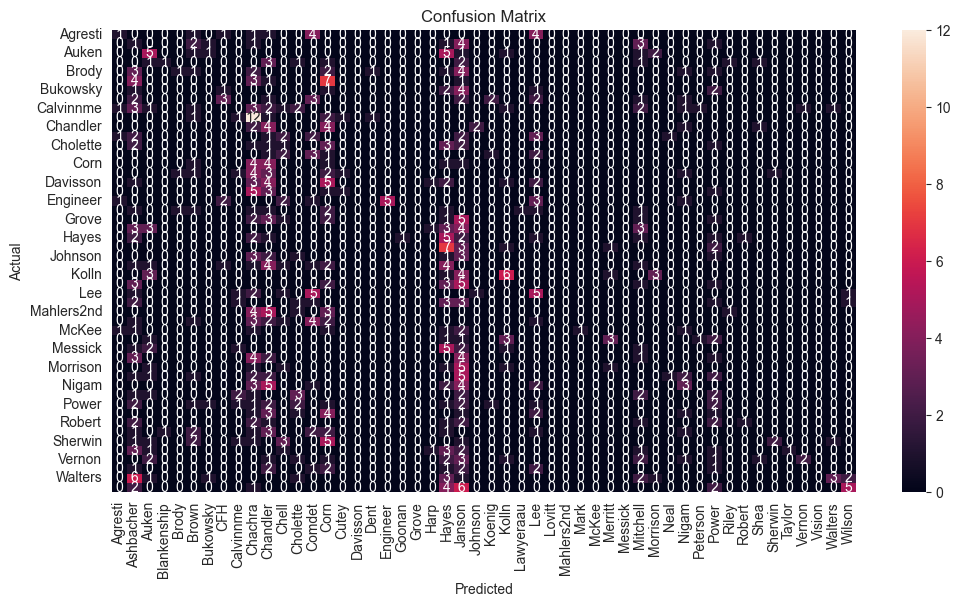

In [24]:
# plot the confusion matrix of the best model
print(results_df.iloc[0])
conf_matrix = np.array(results_df.iloc[0]['conf_matrix'])
conf_matrix = pd.DataFrame(conf_matrix, index=label_mapping.keys(), columns=label_mapping.keys())
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
# plt.savefig('images/confusion_matrix.png')

In [340]:
# read the results_df from csv
results_csv = pd.read_csv('results.csv')
# now merge results_csv with results_df
results_df = pd.concat([results_csv, results_df], ignore_index=True)

FileNotFoundError: [Errno 2] No such file or directory: 'results.csv'

In [304]:
results_df.sort_values(by='accuracy', ascending=False)

,algorithm,validation_method,remove_outliers,scale_data,use_pca,best_params,accuracy,precision,recall,f1
12,svm_classifier,cross_validation,True,True,False,"{'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}",0.606667,0.588667,0.791654,0.545215
13,svm_classifier,cross_validation,False,True,False,"{'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}",0.606667,0.588667,0.791654,0.545215
8,svm_classifier,cross_validation,True,True,True,"{'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}",0.566667,0.545333,0.776794,0.511697
9,svm_classifier,cross_validation,False,True,True,"{'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}",0.566667,0.545333,0.776794,0.511697
15,svm_classifier,cross_validation,False,False,False,"{'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}",0.560000,0.559864,0.581568,0.533870
...,...,...,...,...,...,...,...,...,...,...
39,svm_classifier,holdout,False,False,False,default,0.062222,0.047333,0.007924,0.012099
40,knn_classifier,holdout,True,True,True,default,0.062222,0.054667,0.038076,0.028728
41,knn_classifier,holdout,False,True,True,default,0.062222,0.054667,0.038076,0.028728
44,knn_classifier,holdout,True,True,False,default,0.026667,0.020000,0.000533,0.001039


In [341]:
# save as csv
results_df.to_csv('results.csv', index=False)

In [26]:
results_df[results_df['validation_method'] == 'cross_validation'].sort_values(by='f1', ascending=False).groupby('algorithm').head(1)

,algorithm,validation_method,remove_outliers,scale_data,use_pca,params,time,conf_matrix,accuracy,precision,recall,f1
461,svm_classifier,cross_validation,False,True,False,"{'C': 1, 'kernel': 'linear'}",6.474363,"[[7.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.493333,0.487783,0.759618,0.480460
394,decision_tree_classifier,cross_validation,False,False,False,"{'criterion': 'gini', 'max_depth': 50, 'min_sa...",5.096930,"[[2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 2.0,...",0.350667,0.363415,0.402821,0.355386
570,knn_classifier,cross_validation,False,False,False,"{'metric': 'minkowski', 'n_neighbors': 3, 'wei...",0.682112,"[[3.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...",0.232000,0.232474,0.319790,0.224516


In [27]:
results_df[results_df['validation_method'] == 'holdout'].sort_values(by='f1', ascending=False).groupby('algorithm').head(1)

,algorithm,validation_method,remove_outliers,scale_data,use_pca,params,time,conf_matrix,accuracy,precision,recall,f1
459,svm_classifier,holdout,True,True,False,default,2.547507,"[[3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.591111,0.573667,0.781159,0.588467
562,knn_classifier,holdout,True,False,False,default,0.365251,"[[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,...",0.253333,0.244333,0.467078,0.235010
439,decision_tree_classifier,holdout,False,False,False,default,0.838176,"[[0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0.217778,0.214000,0.449430,0.182080


In [39]:
results_df = pd.read_csv('results.csv')

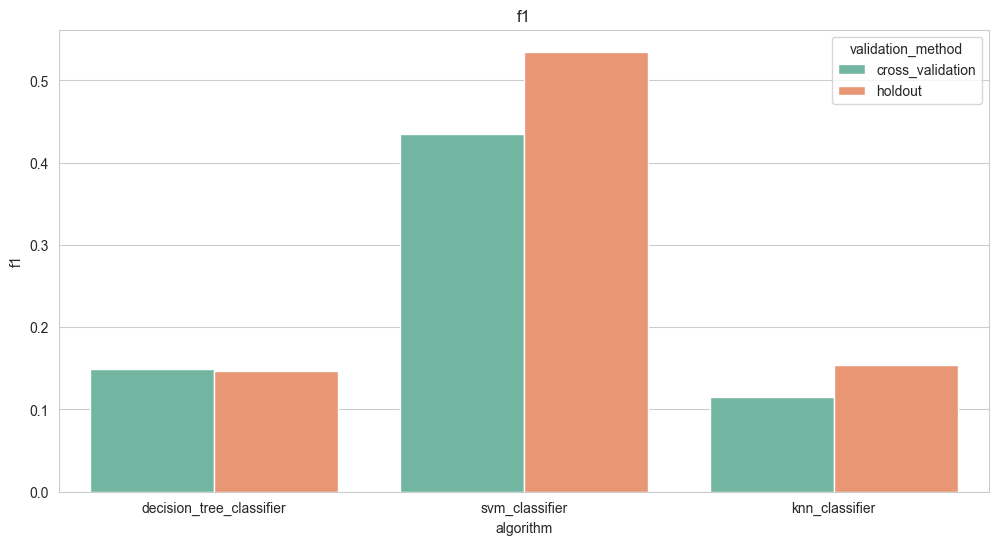

In [40]:
# plot the performance measures in comparision to each other
# TODO: Festlegung auf einen Score (f1)
sns.barplot(data=results_df, x='algorithm', y='f1', hue='validation_method', errorbar=None)
plt.title('f1')
plt.savefig('images/f1.png')

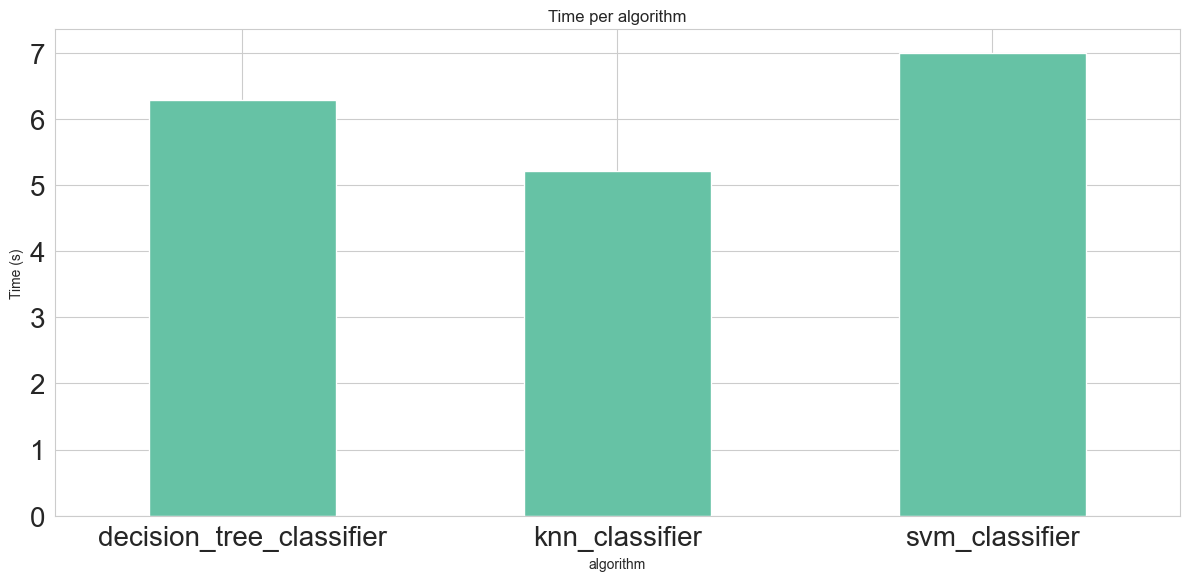

In [41]:
# plot the time difference between the models
results_df['time'] = results_df['time'].astype('float64')
results_df.groupby('algorithm')['time'].mean().plot(kind='bar')
plt.ylabel('Time (s)')
plt.xticks(rotation=0, ha='center')
# make text bigger
plt.gcf().axes[0].tick_params(labelsize=20)
# also make the other text bigger
plt.title('Time per algorithm', fontsize=20)
plt.tight_layout()
plt.title('Time per algorithm')
plt.savefig('images/time.png')

In [42]:
from sklearn.preprocessing import OrdinalEncoder
encoder1 = OrdinalEncoder()
results_df['algorithm'] = encoder1.fit_transform(results_df[['algorithm']])
encoder2 = OrdinalEncoder()
results_df['validation_method'] = encoder2.fit_transform(results_df[['validation_method']])
encoder3 = OrdinalEncoder()
results_df['use_pca'] = encoder3.fit_transform(results_df[['use_pca']])
encoder4 = OrdinalEncoder()
results_df['scale_data'] = encoder4.fit_transform(results_df[['scale_data']])
encoder5 = OrdinalEncoder()
results_df['remove_outliers'] = encoder5.fit_transform(results_df[['remove_outliers']])
results_df.head()

,algorithm,validation_method,remove_outliers,scale_data,use_pca,params,time,conf_matrix,accuracy,precision,recall,f1
0,0.0,0.0,1.0,1.0,1.0,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",9.208977,"[[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0,...",0.112000,0.106024,0.625530,0.091846
1,0.0,0.0,1.0,1.0,1.0,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",7.650104,"[[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...",0.118667,0.113262,0.654299,0.095727
2,0.0,0.0,1.0,1.0,1.0,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",7.444031,"[[2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...",0.116000,0.113413,0.677522,0.096021
3,0.0,0.0,1.0,1.0,1.0,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",7.733919,"[[6.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...",0.109333,0.106653,0.501806,0.094176
4,0.0,0.0,1.0,1.0,1.0,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",7.535774,"[[6.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0,...",0.112000,0.107606,0.489501,0.093963


In [43]:
# plot the correlation between the different variables to the f1 score
df_corr_results = results_df[['algorithm', 'validation_method', 'remove_outliers', 'scale_data', 'use_pca', 'f1']].copy()


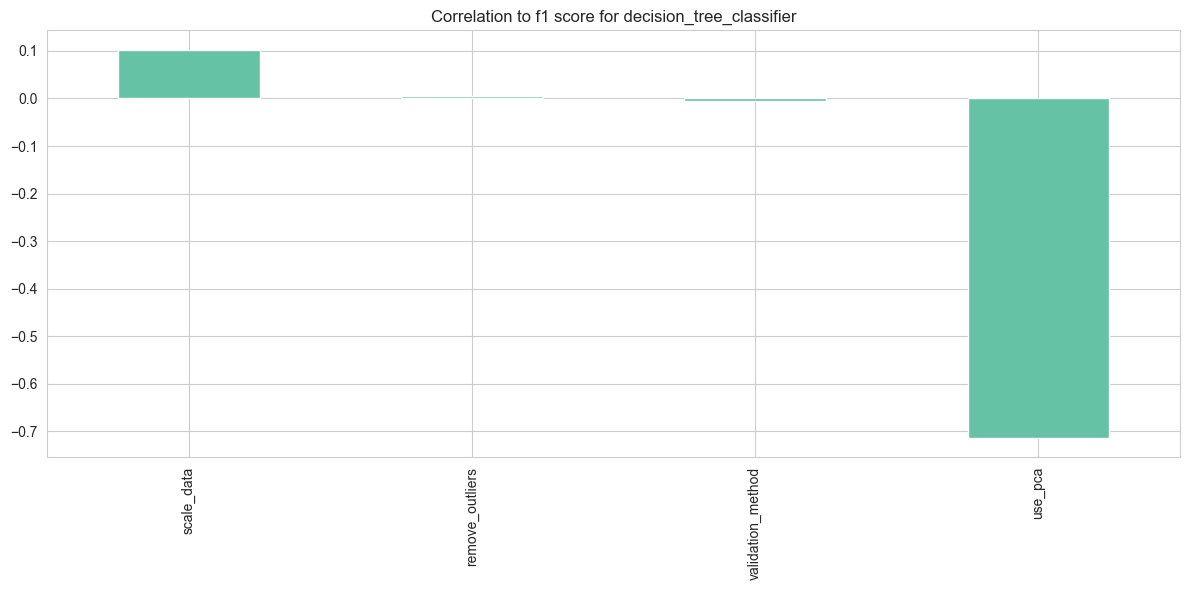

In [44]:
filtered_df = df_corr_results[df_corr_results['algorithm'] == 0]
corr_to_f1 = filtered_df.corr()['f1'].sort_values(ascending=False)
corr_to_f1_sliced = corr_to_f1.drop(['algorithm', 'f1'])
corr_to_f1_sliced.plot(kind='bar')
plt.title(f'Correlation to f1 score for {encoder1.inverse_transform([[0]])[0][0]}')
plt.tight_layout()
plt.savefig(f'images/correlation_{encoder1.inverse_transform([[0]])[0][0]}.png')
plt.show()

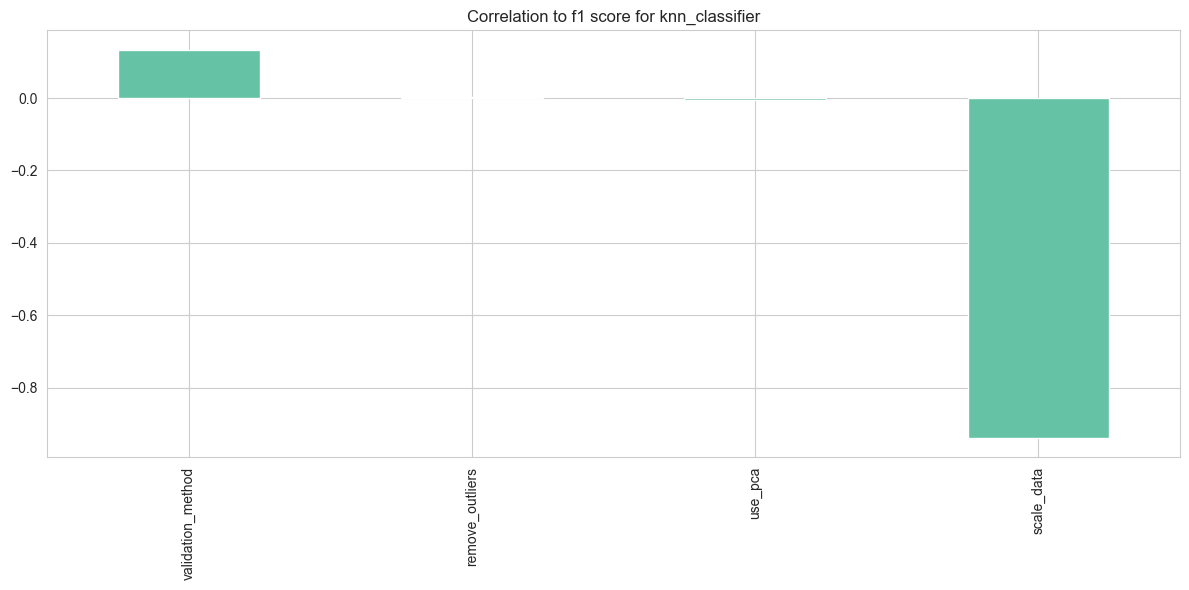

In [45]:
filtered_df = df_corr_results[df_corr_results['algorithm'] == 1]
corr_to_f1 = filtered_df.corr()['f1'].sort_values(ascending=False)
corr_to_f1_sliced = corr_to_f1.drop(['algorithm', 'f1'])
corr_to_f1_sliced.plot(kind='bar')
plt.title(f'Correlation to f1 score for {encoder1.inverse_transform([[1]])[0][0]}')
plt.tight_layout()
plt.savefig(f'images/correlation_{encoder1.inverse_transform([[1]])[0][0]}.png')
plt.show()

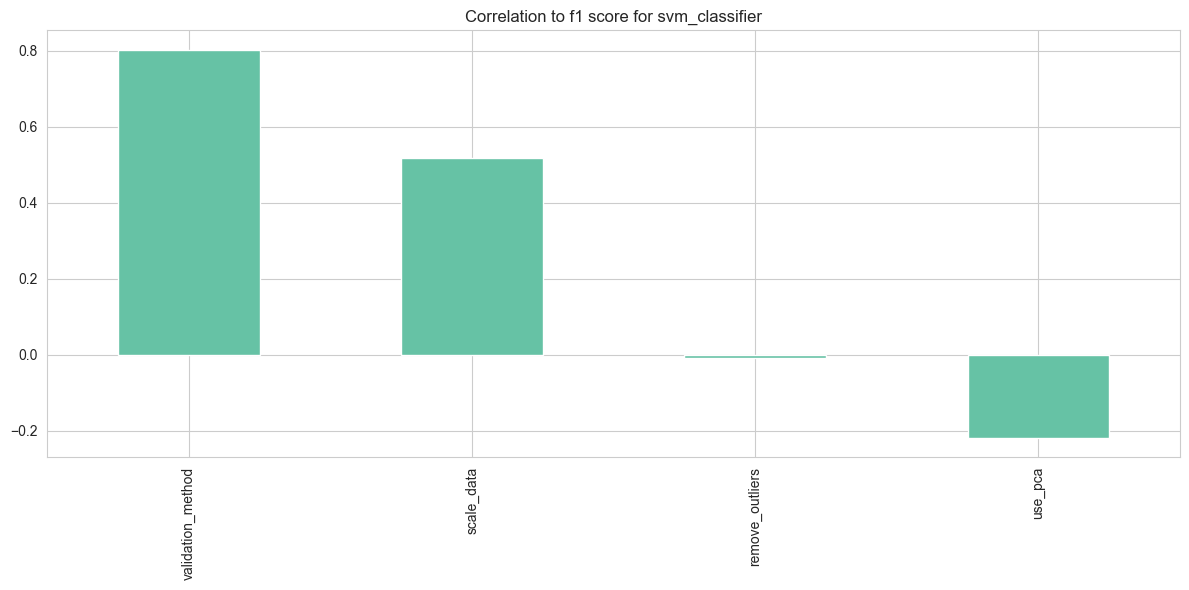

In [46]:
filtered_df = df_corr_results[df_corr_results['algorithm'] == 2]
corr_to_f1 = filtered_df.corr()['f1'].sort_values(ascending=False)
corr_to_f1_sliced = corr_to_f1.drop(['algorithm', 'f1'])
corr_to_f1_sliced.plot(kind='bar')
plt.title(f'Correlation to f1 score for {encoder1.inverse_transform([[2]])[0][0]}')
plt.tight_layout()
plt.savefig(f'images/correlation_{encoder1.inverse_transform([[2]])[0][0]}.png')
plt.show()

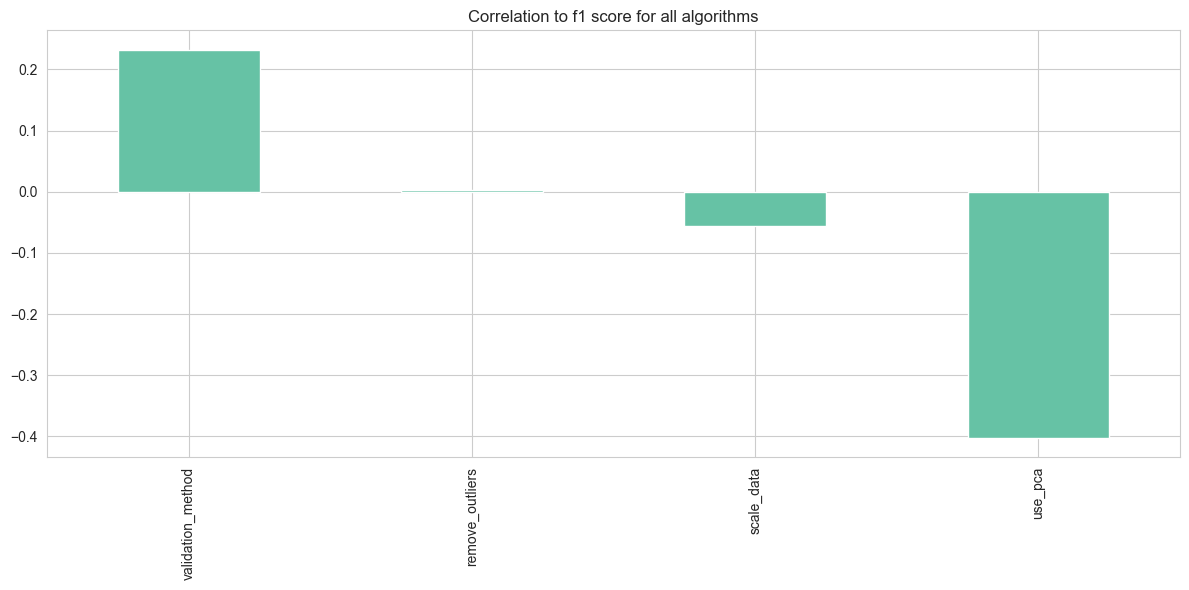

In [47]:
corr_to_f1 = df_corr_results.corr()['f1'].sort_values(ascending=False)
corr_to_f1_sliced = corr_to_f1.drop(['algorithm', 'f1'])
corr_to_f1_sliced.plot(kind='bar')
plt.title(f'Correlation to f1 score for all algorithms')
plt.tight_layout()
plt.savefig(f'images/correlation_all_algorithms.png')
plt.show()

## Recreating best run for Kaggle Submission

In [380]:
label_encoder = LabelEncoder()
y_train_temp = label_encoder.fit_transform(df_train['Class'])

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

y_train_numeric_labels = pd.DataFrame(y_train_temp, columns=['Class'], index=df_train['Class'].index)

y_train_numeric_labels.head()

,Class
ID,
0,20
1,11
2,2
3,16
4,47


In [381]:
label_mapping

{'Agresti': 0,
 'Ashbacher': 1,
 'Auken': 2,
 'Blankenship': 3,
 'Brody': 4,
 'Brown': 5,
 'Bukowsky': 6,
 'CFH': 7,
 'Calvinnme': 8,
 'Chachra': 9,
 'Chandler': 10,
 'Chell': 11,
 'Cholette': 12,
 'Comdet': 13,
 'Corn': 14,
 'Cutey': 15,
 'Davisson': 16,
 'Dent': 17,
 'Engineer': 18,
 'Goonan': 19,
 'Grove': 20,
 'Harp': 21,
 'Hayes': 22,
 'Janson': 23,
 'Johnson': 24,
 'Koenig': 25,
 'Kolln': 26,
 'Lawyeraau': 27,
 'Lee': 28,
 'Lovitt': 29,
 'Mahlers2nd': 30,
 'Mark': 31,
 'McKee': 32,
 'Merritt': 33,
 'Messick': 34,
 'Mitchell': 35,
 'Morrison': 36,
 'Neal': 37,
 'Nigam': 38,
 'Peterson': 39,
 'Power': 40,
 'Riley': 41,
 'Robert': 42,
 'Shea': 43,
 'Sherwin': 44,
 'Taylor': 45,
 'Vernon': 46,
 'Vision': 47,
 'Walters': 48,
 'Wilson': 49}

In [382]:
df_train.drop('Class', axis=1, inplace=True)
df_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V9991,V9992,V9993,V9994,V9995,V9996,V9997,V9998,V9999,V10000
ID,,,,,,,,,,,,,,,,,,,,,
0,14,9,8,12,7,4,5,3,2,2,...,2,0,1,0,1,0,1,1,0,0
1,12,3,8,6,5,3,2,3,2,0,...,0,0,0,0,0,0,0,0,0,0
2,17,5,7,12,8,3,0,3,2,3,...,0,0,1,0,0,0,0,1,0,0
3,9,6,10,6,4,7,7,3,3,3,...,0,0,0,0,0,2,0,0,0,0
4,8,4,5,5,1,7,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0


In [384]:
df_train_final, y_train_final = apply_outlier_removal(df_train, y_train_numeric_labels) 

df_train_final, X_test_final, X_test_final = apply_scaling(df_train_final, X_test, X_test)

n_components = calculate_optimal_pca(df_train_final)
df_train_final, X_test_final = apply_pca(df_train_final, X_test_final, n_components)

In [385]:
# save df_train_final and y_train_final as csv
df_train_final.to_csv('df_train_final.csv', index=False)
y_train_final.to_csv('y_train_final.csv', index=False)

In [387]:
df_train_final.shape

(750, 625)

In [359]:
params = {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}

# initilize svc with these params from a dictionary
model = SVC(**params)

prediction = model.fit(df_train, y_train_numeric_labels).predict(X_test)

c:\Users\tomad\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [360]:
# use the label_mapping to get the original labels
prediction = label_encoder.inverse_transform(prediction)
prediction

array(['Wilson', 'Brown', 'Blankenship', 'Corn', 'Messick', 'Vision',
       'Hayes', 'Kolln', 'Chachra', 'Brown', 'Morrison', 'Neal',
       'Morrison', 'Chachra', 'Kolln', 'Robert', 'Chachra', 'Vision',
       'Davisson', 'Mitchell', 'Cholette', 'Chachra', 'Auken', 'Neal',
       'Calvinnme', 'Nigam', 'Cutey', 'Blankenship', 'Nigam', 'Chachra',
       'Hayes', 'Chachra', 'McKee', 'Davisson', 'Shea', 'Brown',
       'Chachra', 'Ashbacher', 'Auken', 'Chell', 'Wilson', 'Davisson',
       'Agresti', 'Shea', 'CFH', 'Kolln', 'Brody', 'Calvinnme', 'Chell',
       'Sherwin', 'Agresti', 'Corn', 'Calvinnme', 'Comdet', 'Auken',
       'Chachra', 'Engineer', 'Chachra', 'Taylor', 'Koenig', 'Brown',
       'Nigam', 'Riley', 'Wilson', 'Comdet', 'Brown', 'Messick', 'CFH',
       'Calvinnme', 'Cholette', 'Chachra', 'Sherwin', 'Mark', 'Grove',
       'Walters', 'Kolln', 'Chachra', 'Chachra', 'Engineer', 'Messick',
       'Calvinnme', 'Chachra', 'Lawyeraau', 'Lee', 'Janson', 'Grove',
       'Grove', 'W

In [361]:
# transform the prediction to a dataframe with indexes started from 750
prediction = pd.DataFrame(prediction, columns=['Class'], index=X_test.index + 750)

# rename the index column to ID
prediction.index.names = ['ID']

# save prediction as csv
prediction.to_csv('prediction.csv')

,Class
ID,
0,20
1,11
2,2
3,16
4,47
...,...
745,18
746,36
747,7


In [364]:
params = {'learning_rate': [0.01],
        'n_estimators': [100],
        'max_depth': [10],
        'booster': ['gbtree'],
        'tree_method': ['hist'],
        'n_jobs': [-1],
        'device': ['cuda']}

model = XGBClassifier(params)

prediction = model.fit(df_train, y_train_numeric_labels).predict(X_test)
prediction = label_encoder.inverse_transform(prediction)
prediction = pd.DataFrame(prediction, columns=['Class'], index=X_test.index + 750)

# rename the index column to ID
prediction.index.names = ['ID']

# save prediction as csv
prediction.to_csv('XGBoost_prediction.csv')

c:\Users\tomad\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:726: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


In [365]:
df_train.shape

(750, 10001)

In [398]:
xgb_model = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='mlogloss')

# Parameters to test
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20],
    'learning_rate': [0.2, 0.3]
}

param_distributions = {
    'n_estimators': [140, 150, 160],
    'max_depth': [9, 10, 11],
    'learning_rate': [0.18, 0.2, 0.22],
    'gamma': [0, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 1.1]
}

random_search = RandomizedSearchCV(xgb_model, param_distributions, n_iter=50, scoring='accuracy', cv=3, n_jobs=-1, random_state=0, verbose=2)
random_search.fit(df_train, y_train_numeric_labels)

# Best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_
best_params, best_score

Fitting 3 folds for each of 50 candidates, totalling 150 fits


({'subsample': 0.8,
  'reg_lambda': 1,
  'reg_alpha': 0,
  'n_estimators': 160,
  'max_depth': 11,
  'learning_rate': 0.18,
  'gamma': 0,
  'colsample_bytree': 1},
 0.5746666666666665)

In [ ]:
({'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 150},
 0.5173333333333333)
({'learning_rate': 0.3, 'max_depth': 20, 'n_estimators': 200},
 0.5013333333333333)
({'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 150},
 0.5173333333333333)

In [399]:
final_model = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='mlogloss', **best_params)
pred = final_model.fit(df_train, y_train_numeric_labels).predict(X_test)
pred = label_encoder.inverse_transform(pred)
pred = pd.DataFrame(pred, columns=['Class'], index=X_test.index)

# rename the index column to ID
pred.index.names = ['ID']

# save prediction as csv
pred.to_csv('XGBoost_final_prediction.csv')


In [401]:
# make pred index start from 750 as it starts right now from 1500
pred.index = pred.index - 750
pred.head()

,Class
ID,
750,Wilson
751,Brown
752,Blankenship
753,Chandler
754,Messick


In [402]:
pred.to_csv('XGBoost_final_prediction.csv')

In [404]:
param_distributions = {
    'n_estimators': [155, 160, 165],
    'max_depth': [10, 11, 12],
    'learning_rate': [0.175, 0.18, 0.185, 0.19],
    'gamma': [0, 0.05, 0.1, 0.15, 0.2],
    'subsample': [0.75, 0.8, 0.85],
    'colsample_bytree': [0.95, 1],
    'reg_alpha': [0, 0.05, 0.1],
    'reg_lambda': [0.9, 1, 1.05]
}

random_search = RandomizedSearchCV(xgb_model, param_distributions, n_iter=50, scoring='accuracy', cv=3, n_jobs=-1, random_state=0, verbose=2)
random_search.fit(df_train, y_train_numeric_labels)

# Best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_
best_params, best_score

Fitting 3 folds for each of 50 candidates, totalling 150 fits


KeyboardInterrupt: 